# Milestone 1


# 1. Introduction

Name        : Akhdan Azmi

Batch       : RMT-15

Data        : Telco Customer Churn (https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

Objective   : Predict behavior to retain customers

# 2. Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold
from imblearn.over_sampling import SMOTE 

import tensorflow as tf
import kerastuner as kt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras import Model 
from keras.wrappers.scikit_learn import KerasClassifier
tf.random.set_seed(3)

import joblib
import json
import pickle
from shutil import make_archive
from zipfile import ZipFile

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix,ConfusionMatrixDisplay

In [2]:
print(tf.__version__)

2.9.1


# 3. Load Data


In [3]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
# make a copy and show the general information

df = data.copy()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- Telco Custumer Churn memiliki 7043 baris dan 21 kolom dengan typedata float(1), integer(2), dan object(18)
- Berdasarkan deskripsi data, kita perlu mengubah tipe data kolom `TotalCharges` dan `SeniorCitizen` menjadi float dan object
 

In [6]:
# Mengubah tipe data kolom `TotalCharges` dan `SeniorCitizen`

df.TotalCharges =pd.to_numeric(df.TotalCharges,errors = 'coerce')
df.SeniorCitizen = df.SeniorCitizen.astype('object')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# 4. Exploratory Data Analysis

In [7]:
# Descriptive Statistic Summary

df.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,7590-VHVEG,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,2.0,0.0,5901.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


mayoritas kolom adalah kolom kategorikal

In [8]:
# function to display the distribution of numeric data

def distribution(data,kolom):
    
    plt.figure(figsize=(16, 4))
    # histogram
    plt.subplot(1, 2, 1)
    plt.hist(data[kolom], histtype='step', bins=25)  
    plt.axvline(data[kolom].mean(), color='magenta', linestyle='dashed', linewidth=2)
    plt.axvline(data[kolom].median(), color='green', linestyle='dashed', linewidth=2)

    #boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[kolom])

    # Show some statistic 
    print(' skewness: ' + str(data[kolom].skew()))
    print(' kurtosis: ' + str(data[kolom].kurt()))
    print(' Mean: ' + str(data[kolom].mean()))
    print(' Median: ' + str(data[kolom].median()))
    print(' Min: ' + str(data[kolom].min()))
    print(' Max: ' + str(data[kolom].max()))
    print('data distribution of ',kolom)

    plt.show()

# function to display the balance of categorical data

def balance (data, kolom):
    print('Column: ', kolom)
    print('Number of category = ',data[kolom].nunique())
    print( 'Jumlah masing2 value =','\n',data[kolom].value_counts())
    data[kolom].value_counts().plot(kind='bar',figsize=(20, 4))
    plt.show()

In [9]:
# Get Numerical Columns and Categorical Columns

num_columns = df.select_dtypes(include=np.number).columns.tolist()
cat_columns = df.select_dtypes(include=['object']).columns.tolist()
cat_columns.remove('customerID') # menghilangkan kolom custumerID dari list cat_columns

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['tenure', 'MonthlyCharges', 'TotalCharges']
Categorical Columns :  ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


## 4.1 Distribution of Numerical Columns

 skewness: 0.2395397495619829
 kurtosis: -1.387371635971685
 Mean: 32.37114865824223
 Median: 29.0
 Min: 0
 Max: 72
data distribution of  tenure


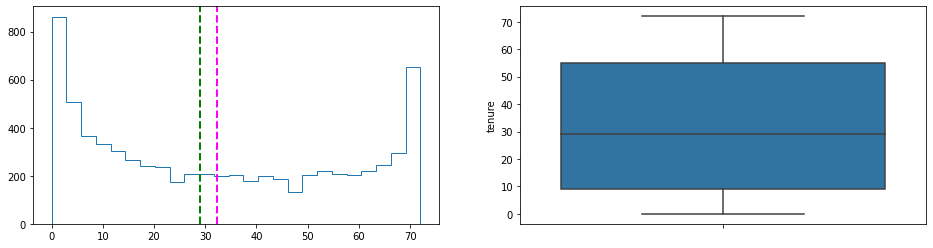

 skewness: -0.22052443394398033
 kurtosis: -1.2572596945495056
 Mean: 64.76169246059918
 Median: 70.35
 Min: 18.25
 Max: 118.75
data distribution of  MonthlyCharges


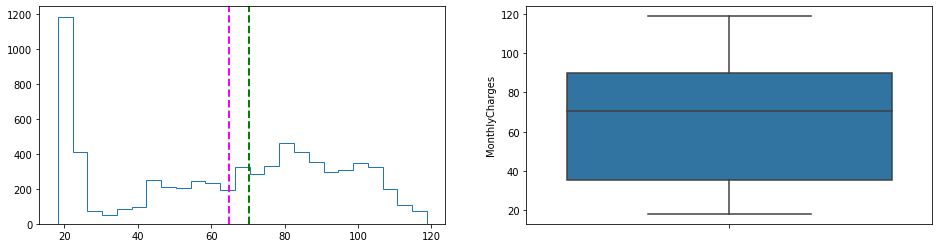

 skewness: 0.961642499724251
 kurtosis: -0.231798760869379
 Mean: 2283.3004408418656
 Median: 1397.475
 Min: 18.8
 Max: 8684.8
data distribution of  TotalCharges


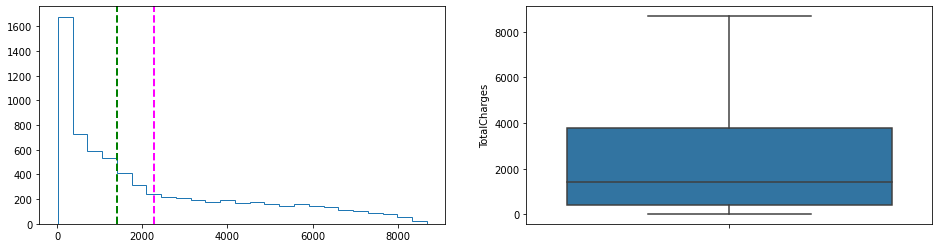

In [10]:
# menggunakan for loop untuk menjalankan fungsi distribution

for i in num_columns:
    distribution(df,i)
    print('='*100)

- `tenure` and `MonthlyCharges` terdistribusi normal dan tidak memilki outliyer
- `TotalCharges` memiliki distribusi data yang positive skewed namun tidak memiliki outliers

## 4.2 Distribution of Categorical Columns

Column:  gender
Number of category =  2
Jumlah masing2 value = 
 Male      3555
Female    3488
Name: gender, dtype: int64


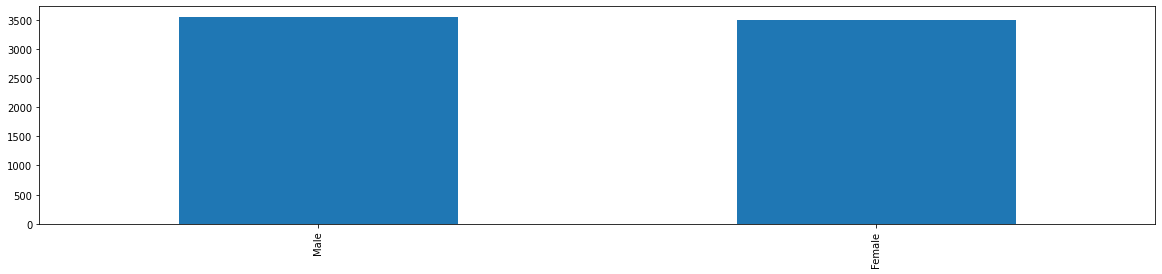

Column:  SeniorCitizen
Number of category =  2
Jumlah masing2 value = 
 0    5901
1    1142
Name: SeniorCitizen, dtype: int64


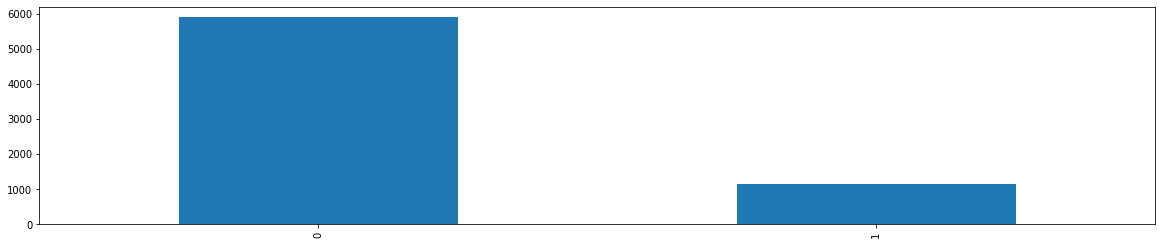

Column:  Partner
Number of category =  2
Jumlah masing2 value = 
 No     3641
Yes    3402
Name: Partner, dtype: int64


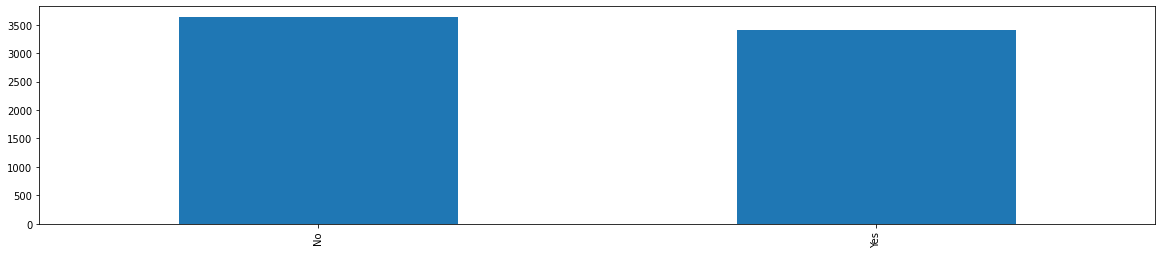

Column:  Dependents
Number of category =  2
Jumlah masing2 value = 
 No     4933
Yes    2110
Name: Dependents, dtype: int64


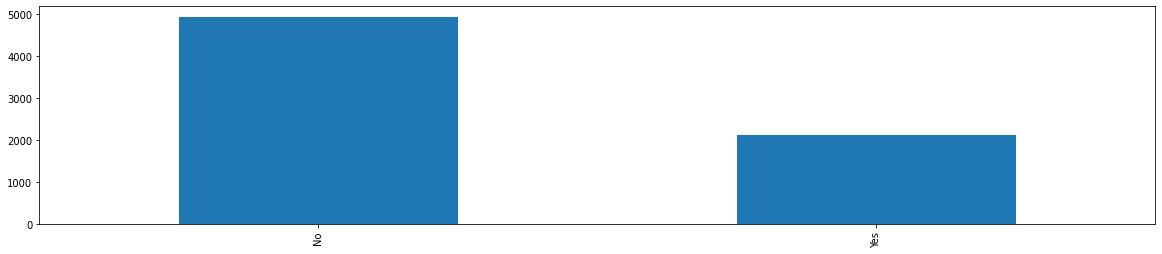

Column:  PhoneService
Number of category =  2
Jumlah masing2 value = 
 Yes    6361
No      682
Name: PhoneService, dtype: int64


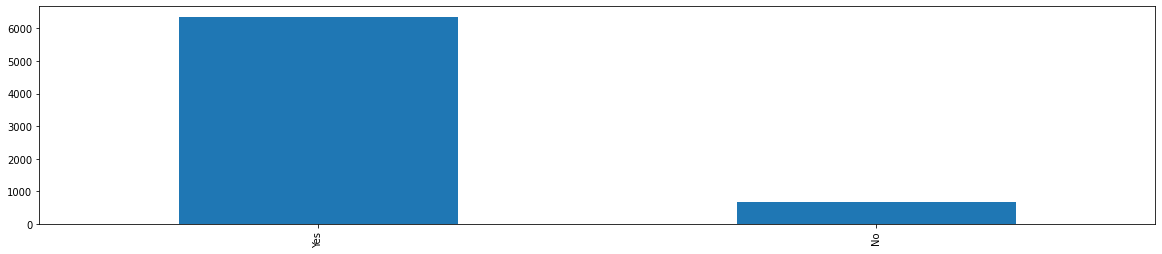

Column:  MultipleLines
Number of category =  3
Jumlah masing2 value = 
 No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


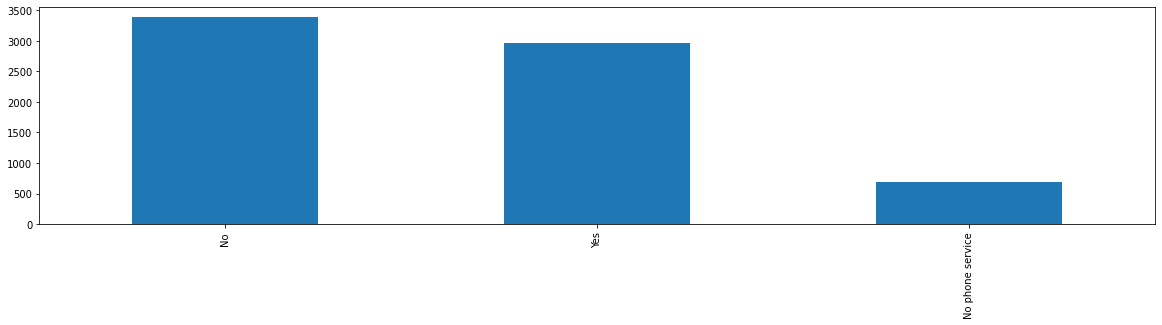

Column:  InternetService
Number of category =  3
Jumlah masing2 value = 
 Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


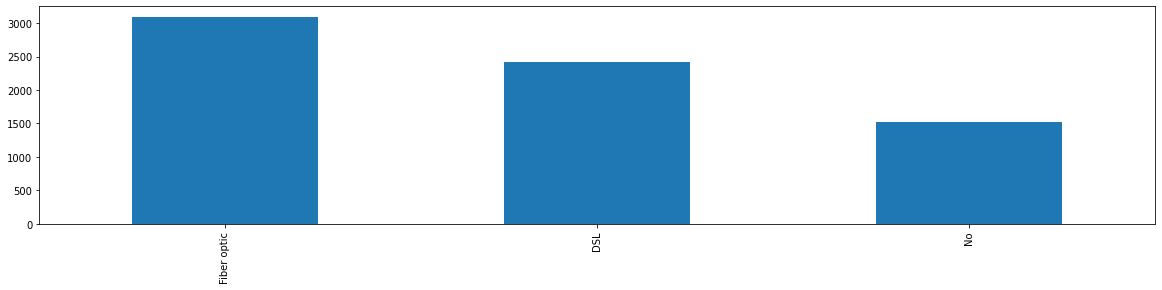

Column:  OnlineSecurity
Number of category =  3
Jumlah masing2 value = 
 No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


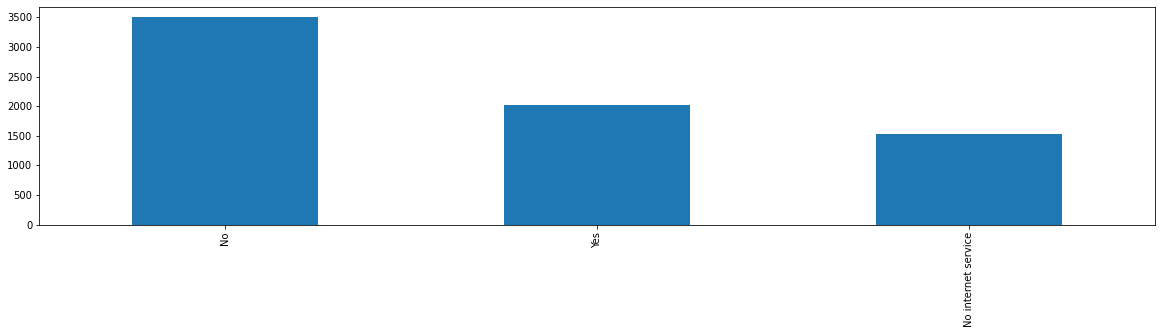

Column:  OnlineBackup
Number of category =  3
Jumlah masing2 value = 
 No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


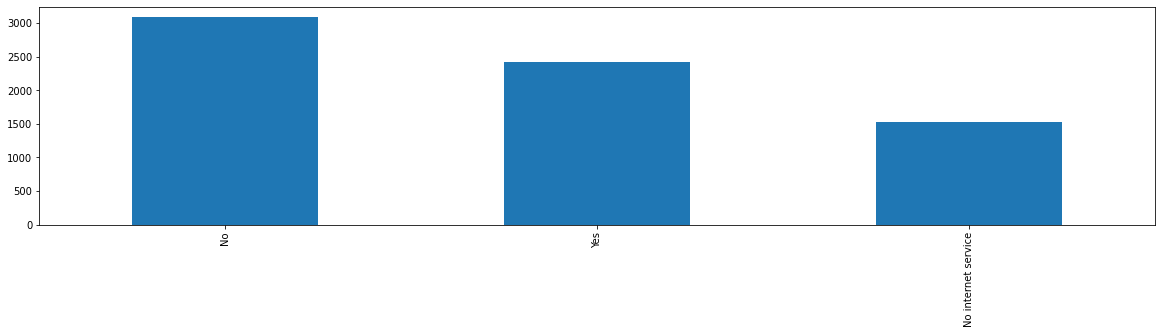

Column:  DeviceProtection
Number of category =  3
Jumlah masing2 value = 
 No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


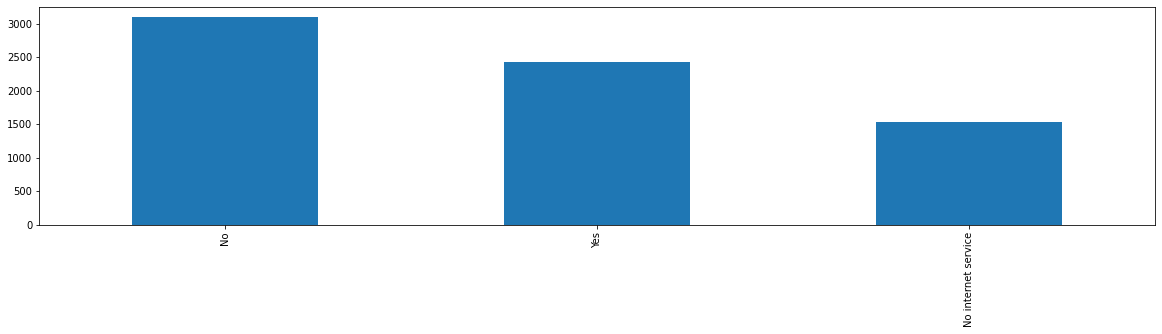

Column:  TechSupport
Number of category =  3
Jumlah masing2 value = 
 No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


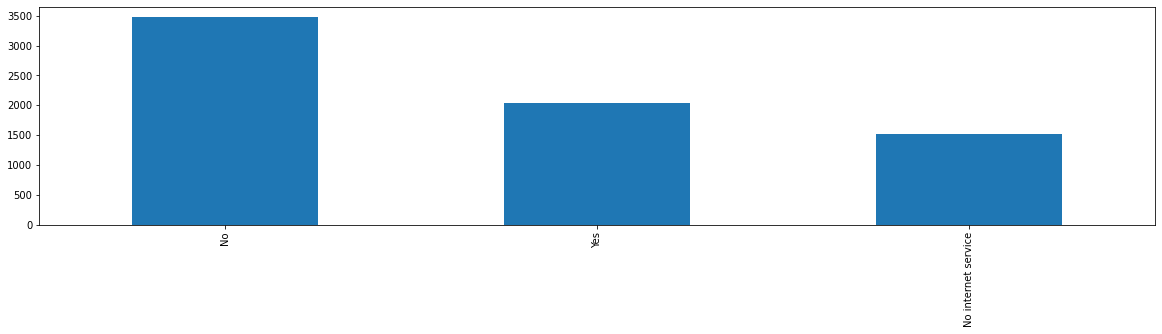

Column:  StreamingTV
Number of category =  3
Jumlah masing2 value = 
 No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


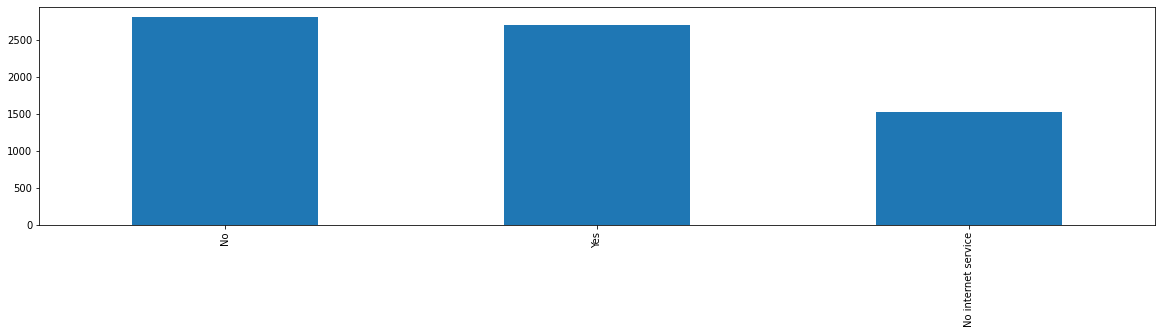

Column:  StreamingMovies
Number of category =  3
Jumlah masing2 value = 
 No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


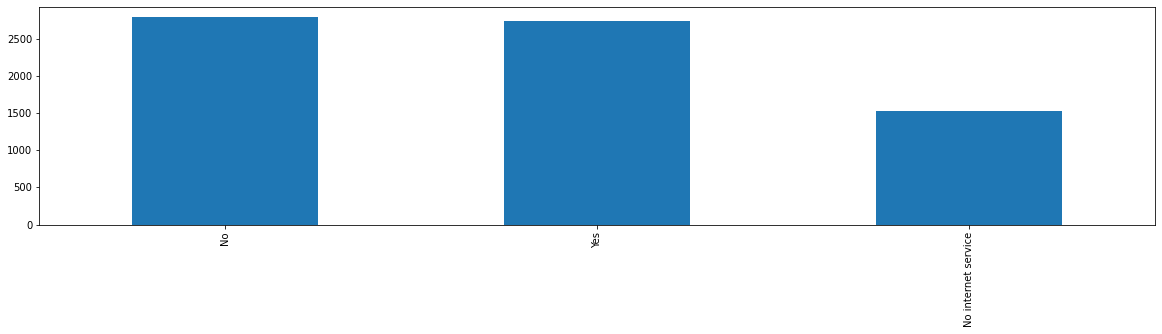

Column:  Contract
Number of category =  3
Jumlah masing2 value = 
 Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


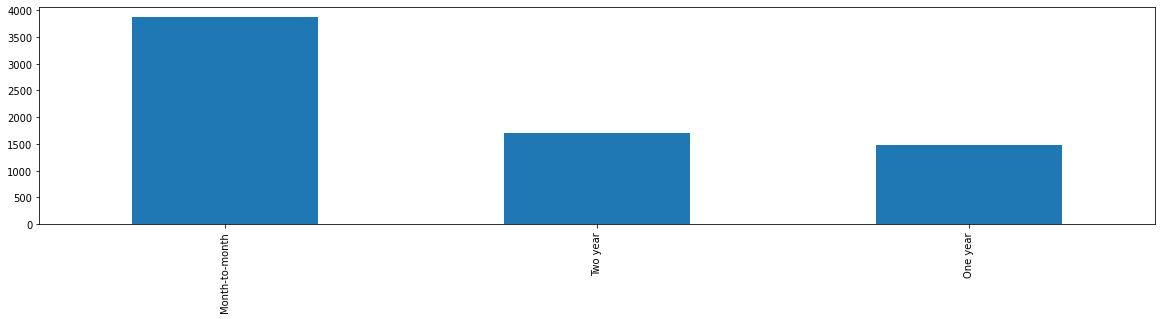

Column:  PaperlessBilling
Number of category =  2
Jumlah masing2 value = 
 Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


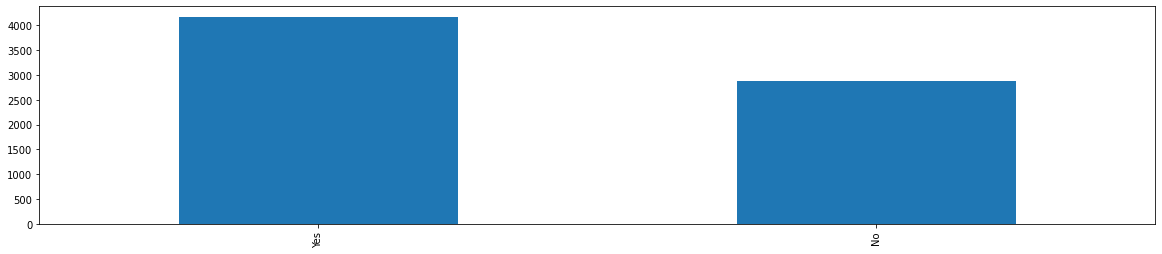

Column:  PaymentMethod
Number of category =  4
Jumlah masing2 value = 
 Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


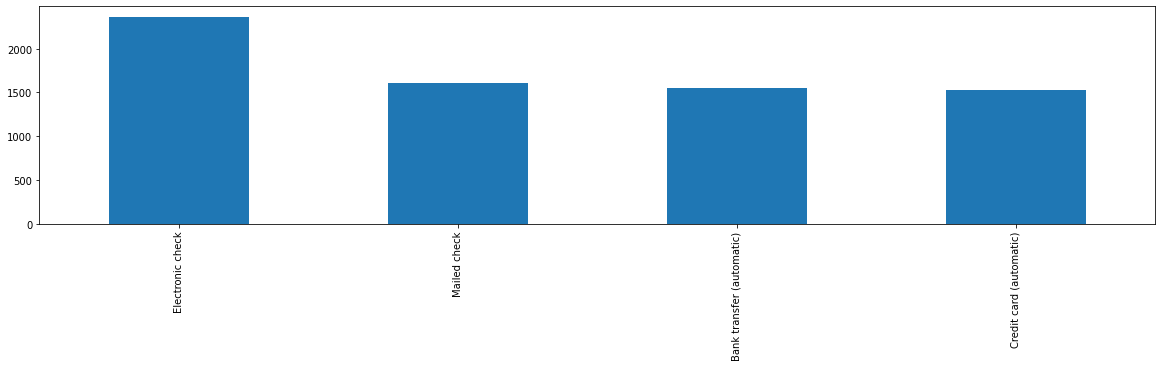

Column:  Churn
Number of category =  2
Jumlah masing2 value = 
 No     5174
Yes    1869
Name: Churn, dtype: int64


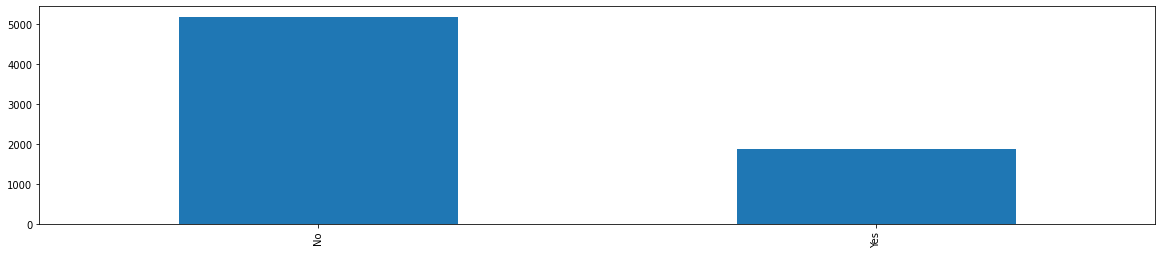

In [11]:
# menggunakan for loop untuk menjalankan fungsi balance

for i in cat_columns:
    balance(df,i)
    print('='*100)

Kolom `Churn`, `SeniorCitizen`, `Contract`, `PhoneService`, `MultipleLines` bersifat imbalance. Perbandingan yes dan No dari kolom `Churn` adalah 1865/5174, hampir 1/3. Dengan demikian pada bab Data Preprocessing akan dilakukan oversampling terhadap kolom `Churn` karena kolom tersebut akan dijadikan data target.

## 4.3 Check Missing Value

In [12]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Terdapat 11 missing values `TotalCharges`

## 4.4 Customer information 

Kolom `'gender'`, `'SeniorCitizen'`,`'Partner'` dan `'Dependents'` berisikan informasi tentang kostumer. kita akan melihat keluarnya kostumer berdasarkan informasi2 tersebut

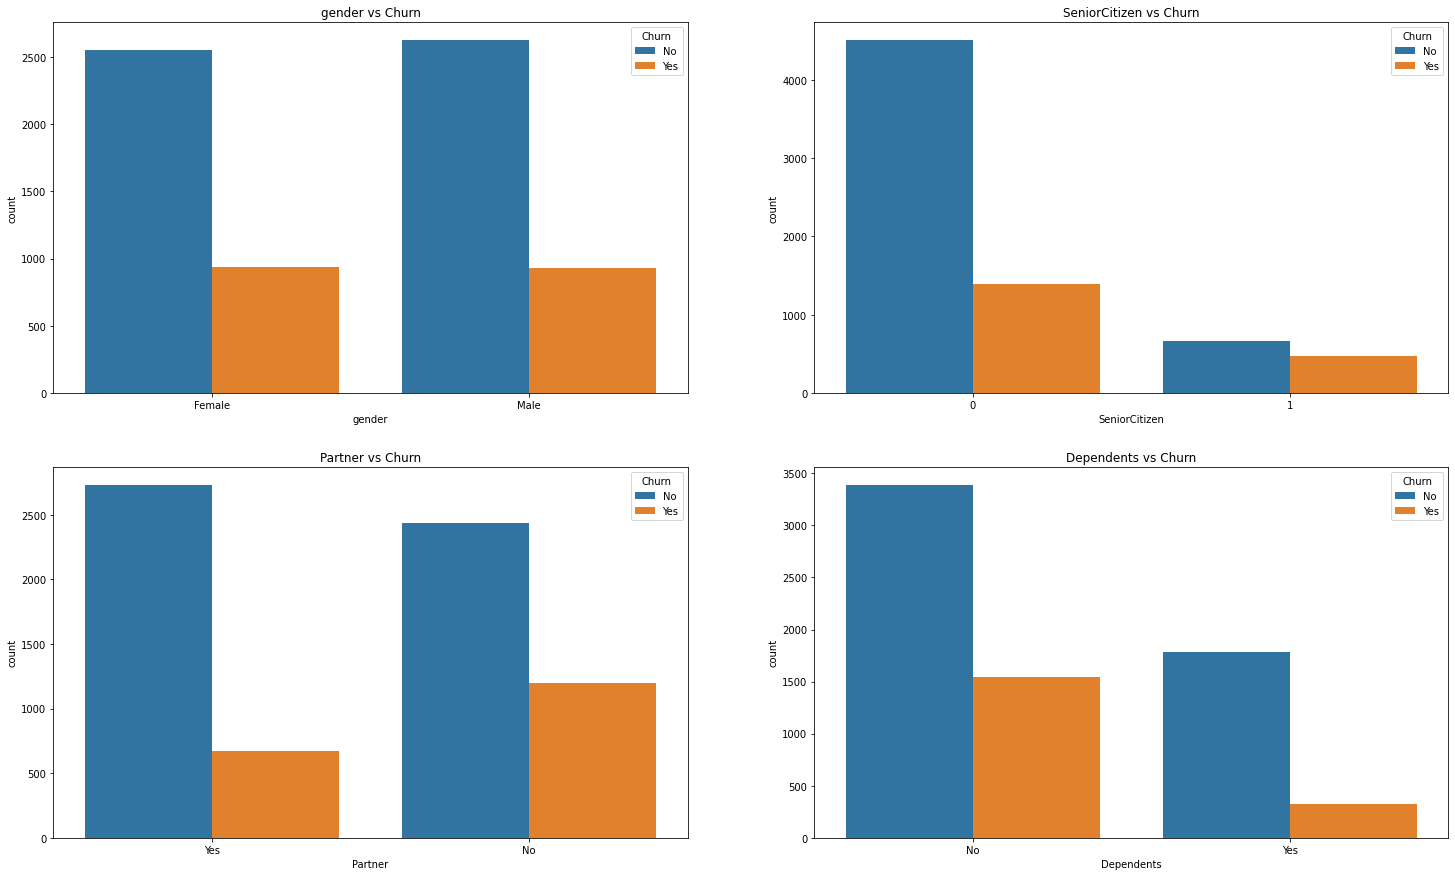

In [71]:
# membuat list  kolom informasi kostumer
cus_info = ['gender','SeniorCitizen','Partner', 'Dependents']

# membuat fig dgn 2 kolom dan 2 baris sehingga dapat diisi 4 grafik
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (25,15))

# menggunakan for loop untuk membuat grafik
for i in range(len(cus_info)):
    plt.subplot(2,2,i+1)
    ax = sns.countplot(cus_info[i],data = df,hue= "Churn")
    title = cus_info[i] + ' vs Churn'
    plt.title(title)

- Terlihat bahwa tidak ada perbedaan jumlah kostumer yang keluar berdasarkan gender
- non-SeniorCitizen cenderung untuk tidak keluar jika dibandingkan dengan SeniorCitizen
- kostumer yang memiliki parner cenderung tidak keluar
- kostumer tidak memiliki tanggungan lebih mudah keluar dari pada yg memiliki tanggungan

# 5. Data Preprocessing

## 5.1 Inference Data

In [13]:
# membuat data iinference berjumlah 10 baris
df_inf = df.sample(n=10, random_state=75)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
# memisahkan data inference dari train-test set dan mereset indexnya

df_train_test= df.drop(index= df_inf.index)
df_train_test.reset_index(drop= True, inplace= True)
df_inf.reset_index(drop= True, inplace=True)

df_train_test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 5.2 Splitting Feature-Target


Kolom `Churn` adalah data target

In [15]:
# memebuat target dan test
X = df_train_test.drop('Churn', axis=1)
y = df_train_test['Churn']


# membuat X_train, X_test, y_train, y_test
X_train_val, X_test, y_train_val, y_test = train_test_split(X,y, test_size= 0.2, random_state= 3,stratify=y)

# membuat validation set
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=3)

print('Train Size : ', X_train_val.shape)
print('Test Size  : ', X_test.shape)
print('Val Size : ', X_val.shape)

Train Size :  (5626, 20)
Test Size  :  (1407, 20)
Val Size :  (1126, 20)


## 5.3 Handling missing value

In [16]:
# cek missing value pada data train
X_train.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        7
dtype: int64

In [17]:
# Drop missing value pada train set
X_train.dropna(inplace=True)
y_train = y_train[X_train.index]


print(X_train.shape)
print(y_train.shape)

(4493, 20)
(4493,)


In [18]:
# Mengecek missing value pada test
X_test.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        4
dtype: int64

In [19]:
# Drop missing value pada test set
X_test.dropna(inplace=True)
y_test = y_test[X_test.index]


print(X_test.shape)
print(y_test.shape)

(1403, 20)
(1403,)


In [20]:
# Mengecek missing value pada validation set
X_val.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

tidak ada missing value pada validation set

## 5.4 Feature Selection

Saya akan menggunakan seluruh kolom sebagai feature, kecuali kolom `customerID`. hal tersebut dilakukan karena ANN sudah memiliki mekanisme pembobotan sendiri.

## 5.5 Make numerical and categorical columns

In [21]:
numeric = X_train.select_dtypes(include=np.number).columns.tolist()
category = X_train.select_dtypes(include=['object']).columns.tolist()
category.remove('customerID')

print('Numerical Columns : ', numeric)
print('Categorical Columns : ', category)

Numerical Columns :  ['tenure', 'MonthlyCharges', 'TotalCharges']
Categorical Columns :  ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [22]:
# Memisahkan masing2 set berdasarkan kolom kategori atau numerik

# Train set
X_train_num = X_train[numeric]
X_train_cat = X_train[category]

# Validation set
X_val_num = X_val[numeric]
X_val_cat = X_val[category]

# Test Set
X_test_num = X_test[numeric]
X_test_cat = X_test[category]

X_test_cat.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
6180,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic)
5462,Female,1,Yes,No,Yes,No,Fiber optic,No,Yes,Yes,No,No,Yes,Two year,No,Credit card (automatic)
2549,Male,1,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Electronic check
1907,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic)
5414,Male,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,Yes,No,No,Two year,No,Credit card (automatic)


## 5.6 Scaling

Disini akan dilakukan scalling karena masing-masing kolom numerik memiliki jenis satuan yang berbeda-beda. Scaling dilakukan dengan MinMaxScaler

In [23]:
scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
X_val_scaled = scaler.transform(X_val_num)

X_train_num_scaled

array([[0.84507042, 0.62238806, 0.55873597],
       [0.94366197, 0.360199  , 0.42188924],
       [0.22535211, 0.83880597, 0.19889452],
       ...,
       [0.6056338 , 0.35870647, 0.26520038],
       [0.8028169 , 0.80497512, 0.65798705],
       [0.        , 0.51243781, 0.00586783]])

## 5.7 Encoding

Selanjutnya dilakukan encoding. metode yang dipilih adalah `one hot encoding` karena semua katergori yang ada bersifat non-ordinal

In [24]:
encoder = OneHotEncoder(handle_unknown='ignore')

X_train_cat_encoded = encoder.fit_transform(X_train_cat).toarray()
X_test_cat_encoded = encoder.transform(X_test_cat).toarray()
X_val_cat_encoded =encoder.transform(X_val_cat).toarray()

X_train_cat_encoded

array([[0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 1., 0., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

In [25]:
# menggabungkan kembali kolom numerik dan kategorik

X_train_final = np.concatenate([X_train_num_scaled, X_train_cat_encoded], axis=1)
X_test_final = np.concatenate([X_test_num_scaled, X_test_cat_encoded], axis=1)
X_val_final = np.concatenate([X_val_scaled , X_val_cat_encoded],axis=1)

X_train_final

array([[0.84507042, 0.62238806, 0.55873597, ..., 0.        , 0.        ,
        0.        ],
       [0.94366197, 0.360199  , 0.42188924, ..., 1.        , 0.        ,
        0.        ],
       [0.22535211, 0.83880597, 0.19889452, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.6056338 , 0.35870647, 0.26520038, ..., 0.        , 1.        ,
        0.        ],
       [0.8028169 , 0.80497512, 0.65798705, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.51243781, 0.00586783, ..., 0.        , 1.        ,
        0.        ]])

In [26]:
# Mengubah value Yes dan No pada data target menjadi 1 dan 1

y_train = y_train.replace(['Yes','No'],[1,0])
y_val = y_val.replace(['Yes','No'],[1,0])
y_test = y_test.replace(['Yes','No'],[1,0])

y_val.unique()

array([0, 1], dtype=int64)

## 5.8 Handling imbalance data target

Sebagaimana yang telah dijelaskan pada bab EDA, data target bersifat imbalance. hal tersebut dapat membuat model lebih cenderung untuk menghasilkan prediksi ke salah satu kategori karena model lebih banyak belajar tentang salah satu kategori saja. Sehingga di sini akan dilakukan `oversampling dengan SMOTE`. Secara sederhana, cara kerjanya adalah dengan menambahkan data dengan ked alam dataset sedemikian rupa sehingga kolom `Churn` memiliki jumlah value `Yes` dan `No` yang sama

In [27]:
# melihat perbandingan jumlah masing2 kategori
y_train.value_counts()

0    3302
1    1191
Name: Churn, dtype: int64

In [28]:
# Melihat ukuran data target
y_train.shape

(4493,)

In [29]:
# Melakukan oversampling dengan SMOTE

sm = SMOTE(sampling_strategy='auto', k_neighbors=8, random_state=4)
X_train_res, y_train_res = sm.fit_resample(X_train_final, y_train)

print(y_train_res.value_counts())
print('y_train_res shape = ',y_train_res.shape)

0    3302
1    3302
Name: Churn, dtype: int64
y_train_res shape =  (6604,)


Sekarang jumlah kategori `Yes` dan `No` pada data target sudah sama

## 5.9 Pipeline

In [30]:
# Membuat data train set dengan tensor slice
df_train = tf.data.Dataset.from_tensor_slices((X_train_res, y_train_res))

# meng-suffle data train set
df_train_shuffle = df_train.shuffle(buffer_size=1024).batch(64)

## melakukan hal yang sama untuk test set namun tidak perlu di-suffle
df_test = tf.data.Dataset.from_tensor_slices((X_test_final, y_test))
df_test = df_test.batch(64)

# 6. Model Definition

Pada tahap ini akan dilakukan pendefinisian model dengan ANN. Di sini akan dilakukan dengan Sequential API dan Functional API.

 **`Metric yang dipilih adalah Recall`** karena kita berusaha membuat model yang sebisa mungkin tidak akan menghasilkan False Negative dimana model memprediksi bahwa seorang kostumer tidak akan keluar (`Churn`= No) padahal sebenarnya dia akan keluar (`Churn`=yes)

## 6.1 Sequential

Mendefinisikan model dengan sequential API. model memiliki 2 layer dengan masing2 memiliki 10 dan 8 node. kemudian diakhiri dengan 1 node untuk output layer. Untuk hidden layer digunakan ReLu activation function dan sigmoid untuk output layer 

In [31]:
model_sequential = Sequential()
model_sequential.add(Dense(10, activation='relu', input_shape=(46,))) # Hidden Layer 1
model_sequential.add(Dense(8, activation='relu', input_shape=(46,))) # Hidden Layer 2
model_sequential.add(Dense(1, activation='sigmoid'))  # Output Layer

# Compile
model_sequential.compile(loss='binary_crossentropy',
                         optimizer='Adam',
                         metrics=['Recall'])

model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                470       
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 567
Trainable params: 567
Non-trainable params: 0
_________________________________________________________________


## 6.2 Functional

Mendefinisikan model dengan functional API. model memiliki 2 layer dengan masing2 memiliki 10 dan 8 node. kemudian diakhiri dengan 1 node untuk output layer. Untuk hidden layer digunakan ReLu activation function dan sigmoid untuk output layer

In [32]:
input_layer = Input(shape=(46,))
hidden_layer_1 = Dense(10, activation='relu')(input_layer)
hidden_layer_2 = Dense(8, activation='relu')(hidden_layer_1)
output_layer = Dense(1, activation='sigmoid')(hidden_layer_2)

model_functional = Model(inputs=input_layer, outputs=output_layer)

# Model Compile
model_functional.compile(loss='binary_crossentropy', 
                         optimizer='Adam',
                         metrics=['Recall'])

model_functional.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 46)]              0         
                                                                 
 dense_3 (Dense)             (None, 10)                470       
                                                                 
 dense_4 (Dense)             (None, 8)                 88        
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 567
Trainable params: 567
Non-trainable params: 0
_________________________________________________________________


# 7. Model Training

## 7.1 Sequential

In [33]:
%%time
## Train the Model

history_seq = model_sequential.fit(df_train_shuffle, validation_data=(X_val_final, y_val),epochs=50)

Epoch 1/50
104/104 [==============================] - 1s 4ms/step - loss: 0.6078 - recall: 0.4627 - val_loss: 0.7336 - val_recall: 0.9205
Epoch 2/50
104/104 [==============================] - 0s 2ms/step - loss: 0.5692 - recall: 0.7150 - val_loss: 0.7330 - val_recall: 0.9205
Epoch 3/50
104/104 [==============================] - 0s 2ms/step - loss: 0.5463 - recall: 0.7913 - val_loss: 0.7033 - val_recall: 0.9007
Epoch 4/50
104/104 [==============================] - 0s 2ms/step - loss: 0.5291 - recall: 0.8028 - val_loss: 0.6855 - val_recall: 0.8907
Epoch 5/50
104/104 [==============================] - 0s 2ms/step - loss: 0.5254 - recall: 0.8098 - val_loss: 0.6708 - val_recall: 0.8974
Epoch 6/50
104/104 [==============================] - 0s 2ms/step - loss: 0.5207 - recall: 0.8147 - val_loss: 0.6537 - val_recall: 0.8874
Epoch 7/50
104/104 [==============================] - 0s 2ms/step - loss: 0.5135 - recall: 0.8171 - val_loss: 0.6412 - val_recall: 0.8841
Epoch 8/50
104/104 [==============

## 7.2 Functional

In [34]:
%%time
history_func = model_functional.fit(df_train_shuffle, validation_data=(X_val_final, y_val),epochs=50)

Epoch 1/50
104/104 [==============================] - 1s 3ms/step - loss: 0.5783 - recall: 0.4788 - val_loss: 0.7276 - val_recall: 0.9338
Epoch 2/50
104/104 [==============================] - 0s 1ms/step - loss: 0.5638 - recall: 0.7399 - val_loss: 0.6894 - val_recall: 0.9272
Epoch 3/50
104/104 [==============================] - 0s 1ms/step - loss: 0.5407 - recall: 0.7883 - val_loss: 0.6681 - val_recall: 0.9040
Epoch 4/50
104/104 [==============================] - 0s 2ms/step - loss: 0.5303 - recall: 0.8083 - val_loss: 0.6486 - val_recall: 0.8907
Epoch 5/50
104/104 [==============================] - 0s 2ms/step - loss: 0.5212 - recall: 0.8141 - val_loss: 0.6472 - val_recall: 0.8907
Epoch 6/50
104/104 [==============================] - 0s 2ms/step - loss: 0.5194 - recall: 0.8159 - val_loss: 0.6453 - val_recall: 0.8874
Epoch 7/50
104/104 [==============================] - 0s 2ms/step - loss: 0.5156 - recall: 0.8198 - val_loss: 0.6286 - val_recall: 0.8808
Epoch 8/50
104/104 [==============

## 7.3 Sequential API Optimization

Disini dilakukan training untuk Optimasi Sequential API. Optimasi dilakukan dengan Hyperparameter Tuning menggunakan GridSearchVC. Metric yang digunakan adalah `Recall`

Variable2 yang akan di-tuning adalah:
- Jumlah layer berserta jumlah Node nya, 
- Jenis activation function nya. 

Selain itu juga dilakukan Dropping untuk mengurangi kompleksitas model yang dibuat

In [35]:
# membuat fungsi untuk tuning

def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_train_final.shape[1]))
            model.add(tf.keras.layers.Activation(activation))
            model.add(tf.keras.layers.Dropout(0.3))
        else:
            model.add(Dense(nodes))
            model.add(tf.keras.layers.Activation(activation))
            model.add(tf.keras.layers.Dropout(0.3))
            
    model.add(Dense(units = 1, kernel_initializer= 'glorot_uniform', activation = 'sigmoid')) 
    
    model.compile(optimizer='Adam', loss='binary_crossentropy',metrics=['Recall'])
    return model
    
model = KerasClassifier(build_fn=create_model, verbose=0)

In [72]:
# Mendefinisikan variable2 yang akan di-tuning
param_grid= dict(
    layers =[[20], [40, 20], [45, 30, 15]],
    activation= ['sigmoid', 'relu'],
    epochs= [50]
)

grid_seq = GridSearchCV(estimator=model, param_grid=param_grid,cv=3,verbose=2)

In [73]:
%%time
grid_result_seq = grid_seq.fit(
    X_train_res, y_train_res,
    validation_data=(X_val_final, y_val),
    callbacks=[keras.callbacks.EarlyStopping(patience=3)]) # menggunakan callback 

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END .........activation=sigmoid, epochs=50, layers=[20]; total time=   2.5s
[CV] END .........activation=sigmoid, epochs=50, layers=[20]; total time=   1.9s
[CV] END .........activation=sigmoid, epochs=50, layers=[20]; total time=   8.8s
[CV] END .....activation=sigmoid, epochs=50, layers=[40, 20]; total time=   2.2s
[CV] END .....activation=sigmoid, epochs=50, layers=[40, 20]; total time=   1.9s
[CV] END .....activation=sigmoid, epochs=50, layers=[40, 20]; total time=   3.9s
[CV] END .activation=sigmoid, epochs=50, layers=[45, 30, 15]; total time=   2.3s
[CV] END .activation=sigmoid, epochs=50, layers=[45, 30, 15]; total time=   3.1s
[CV] END .activation=sigmoid, epochs=50, layers=[45, 30, 15]; total time=   5.1s
[CV] END ............activation=relu, epochs=50, layers=[20]; total time=   2.0s
[CV] END ............activation=relu, epochs=50, layers=[20]; total time=   1.7s
[CV] END ............activation=relu, epochs=50, 

In [74]:
grid_result_seq.best_params_

{'activation': 'sigmoid', 'epochs': 50, 'layers': [20]}

Best parameter yang bisa digunakan adalah:
- activation function = sigmoid
- jumlah hidden layer = 1 dengan 20 node

In [75]:
grid_result_seq.best_estimator_

## 7.4 Functional API Optimization

Disini dilakukan optimasi terhadap Functional API dengan melakukan Bacth normalization dan dropout untuk mengurangi kompleksitas model

In [40]:
input_layer = Input(shape=(46,))

normal_1= tf.keras.layers.BatchNormalization()(input_layer)
layer_1 = Dense(10, activation='relu')(normal_1)
dropout_1 = tf.keras.layers.Dropout(.3)(layer_1)

normal_2= tf.keras.layers.BatchNormalization()(dropout_1)
layer_2 = Dense(8, activation='relu')(normal_2)
dropout_2 = tf.keras.layers.Dropout(.3)(layer_2)

output_layer_op = Dense(1, activation='sigmoid')(dropout_2)

model_func_op = Model(inputs=input_layer, outputs=output_layer_op)

# Model Compile
model_func_op.compile(loss='binary_crossentropy', 
                         optimizer='Adam',
                         metrics=['Recall'])

model_func_op.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 46)]              0         
                                                                 
 batch_normalization (BatchN  (None, 46)               184       
 ormalization)                                                   
                                                                 
 dense_62 (Dense)            (None, 10)                470       
                                                                 
 dropout_37 (Dropout)        (None, 10)                0         
                                                                 
 batch_normalization_1 (Batc  (None, 10)               40        
 hNormalization)                                                 
                                                                 
 dense_63 (Dense)            (None, 8)                 88  

In [41]:
%%time
history_func_op = model_func_op.fit(df_train_shuffle, validation_data=(X_val_final, y_val),epochs=50)

Epoch 1/50
104/104 [==============================] - 1s 4ms/step - loss: 0.7108 - recall: 0.2265 - val_loss: 0.6023 - val_recall: 0.6026
Epoch 2/50
104/104 [==============================] - 0s 3ms/step - loss: 0.6545 - recall: 0.4494 - val_loss: 0.5846 - val_recall: 0.7450
Epoch 3/50
104/104 [==============================] - 0s 2ms/step - loss: 0.6453 - recall: 0.5790 - val_loss: 0.5679 - val_recall: 0.7914
Epoch 4/50
104/104 [==============================] - 0s 2ms/step - loss: 0.6317 - recall: 0.6557 - val_loss: 0.5574 - val_recall: 0.8013
Epoch 5/50
104/104 [==============================] - 0s 2ms/step - loss: 0.6276 - recall: 0.6914 - val_loss: 0.5522 - val_recall: 0.8013
Epoch 6/50
104/104 [==============================] - 0s 2ms/step - loss: 0.6274 - recall: 0.7241 - val_loss: 0.5503 - val_recall: 0.8146
Epoch 7/50
104/104 [==============================] - 0s 2ms/step - loss: 0.6217 - recall: 0.7283 - val_loss: 0.5471 - val_recall: 0.8046
Epoch 8/50
104/104 [==============

# 8. Evaluation

## 8.1 Sequential

In [42]:
history_seq_df = pd.DataFrame(history_seq.history)
history_seq_df.head()

,loss,recall,val_loss,val_recall
0,0.607754,0.462750,0.733646,0.920530
1,0.569155,0.715021,0.732958,0.920530
2,0.546350,0.791339,0.703263,0.900662
3,0.529057,0.802847,0.685496,0.890728
4,0.525370,0.809812,0.670772,0.897351


<AxesSubplot:>

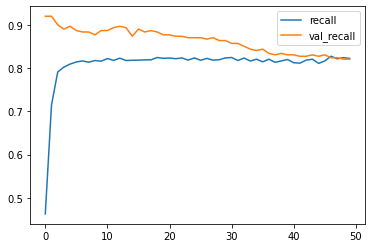

In [43]:
# Plot antara recall dan val_recall

history_seq_df[['recall', 'val_recall']].plot()

- Untuk train set mengalami kenaikan hingga akhirnya stagnan di sekitar 0.8
- validation set memiliki nilai recal yang tinggi di awal lalu kemudian menurun dan bersinggungan dengan nilai recall train set

<AxesSubplot:>

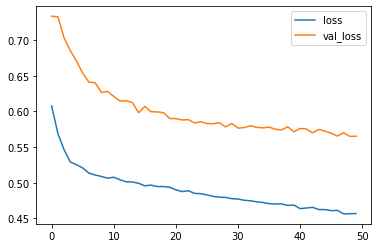

In [44]:
# Plot between loss and val_loss

history_seq_df[['loss', 'val_loss']].plot()

tidak ada fenomena vanishing maupun exploding gradient, namun nilai loss function antara train set dan val set cukup berjauhan dengan selisih hingga 0.1

In [82]:
# Model Evaluation using Classification Report
y_train_pred_seq = model_sequential.predict(X_train_final)
y_train_pred_seq = np.where(y_train_pred_seq >= 0.5, 1, 0)
y_test_pred_seq = model_sequential.predict(X_test_final)
y_test_pred_seq = np.where(y_test_pred_seq >= 0.5, 1, 0)

print('Train set')
print(classification_report(y_train, y_train_pred_seq))
print('Test set')
print(classification_report(y_test, y_test_pred_seq))

44/44 [==============================] - 0s 628us/step
Train set
              precision    recall  f1-score   support

           0       0.94      0.65      0.77      3302
           1       0.48      0.89      0.62      1191

    accuracy                           0.71      4493
   macro avg       0.71      0.77      0.69      4493
weighted avg       0.82      0.71      0.73      4493

Test set
              precision    recall  f1-score   support

           0       0.92      0.65      0.76      1029
           1       0.47      0.84      0.60       374

    accuracy                           0.70      1403
   macro avg       0.69      0.75      0.68      1403
weighted avg       0.80      0.70      0.72      1403



- train set dan test set masing2 memiliki nilai recall 0.89 dan 0.84. nilai yang cukup baik dan tidak overfitting
- baik train set maupun test set memiliki nilai precision dan f1 yang buruk, namun itu tidak masalah karean yang diharapkan adalah nilai recall yang baik

## 8.2 Functional

In [46]:
history_func_df = pd.DataFrame(history_func.history)
history_func_df.head()

,loss,recall,val_loss,val_recall
0,0.578325,0.478801,0.727611,0.933775
1,0.563832,0.739855,0.689405,0.927152
2,0.540696,0.788310,0.668114,0.903974
3,0.530278,0.808298,0.648575,0.890728
4,0.521224,0.814052,0.647224,0.890728


<AxesSubplot:>

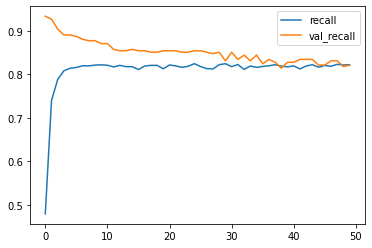

In [47]:
# Plot between recall and val_recall

history_func_df[['recall', 'val_recall']].plot()

<AxesSubplot:>

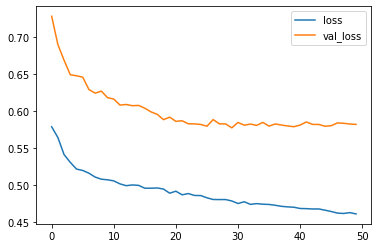

In [48]:
# Plot between loss and val_loss

history_func_df[['loss', 'val_loss']].plot()

In [83]:
# Model Evaluation using Classification Report
y_train_pred_func = model_functional.predict(X_train_final)
y_train_pred_func = np.where(y_train_pred_seq >= 0.5, 1, 0)
y_test_pred_func = model_functional.predict(X_test_final)
y_test_pred_func = np.where(y_test_pred_seq >= 0.5, 1, 0)

print('Train set')
print(classification_report(y_train, y_train_pred_func))
print('Test set')
print(classification_report(y_test, y_test_pred_func))

44/44 [==============================] - 0s 698us/step
Train set
              precision    recall  f1-score   support

           0       0.94      0.65      0.77      3302
           1       0.48      0.89      0.62      1191

    accuracy                           0.71      4493
   macro avg       0.71      0.77      0.69      4493
weighted avg       0.82      0.71      0.73      4493

Test set
              precision    recall  f1-score   support

           0       0.92      0.65      0.76      1029
           1       0.47      0.84      0.60       374

    accuracy                           0.70      1403
   macro avg       0.69      0.75      0.68      1403
weighted avg       0.80      0.70      0.72      1403



model functional API memiliki nilai metrik yang mirip dengan model sequential API

## 8.3 Sequential Optimization

In [84]:
# Model Evaluation using Classification Report
y_train_pred_seq_op = grid_result_seq.predict(X_train_final)
y_train_pred_seq_op = np.where(y_train_pred_seq_op >= 0.5, 1, 0)
y_test_pred_seq_op = grid_result_seq.predict(X_test_final)
y_test_pred_seq_op = np.where(y_test_pred_seq_op >= 0.5, 1, 0)

print('Train set')
print(classification_report(y_train, y_train_pred_seq_op))
print('Test set')
print(classification_report(y_test, y_test_pred_seq_op))

44/44 [==============================] - 0s 651us/step
Train set
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      3302
           1       0.52      0.80      0.63      1191

    accuracy                           0.75      4493
   macro avg       0.71      0.77      0.72      4493
weighted avg       0.81      0.75      0.76      4493

Test set
              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1029
           1       0.54      0.78      0.64       374

    accuracy                           0.76      1403
   macro avg       0.72      0.77      0.73      1403
weighted avg       0.81      0.76      0.77      1403



- hasil dari optimasi ternyata justru lebih buruk dari pada sebelumnya
- hal tersebut kemungkinan terjadi akibat dari meningkatnya kompleksitas model karena jumlah node yang digunakan adalah 20 node dalam 1 hidden layer saja

## 8.4 Functional Optimization

In [85]:
history_func_df_op = pd.DataFrame(history_func_op.history)
history_func_df_op.head()

,loss,recall,val_loss,val_recall
0,0.710783,0.226529,0.602347,0.602649
1,0.654513,0.449425,0.584590,0.745033
2,0.645301,0.579043,0.567877,0.791391
3,0.631685,0.655663,0.557395,0.801324
4,0.627587,0.691399,0.552226,0.801324


<AxesSubplot:>

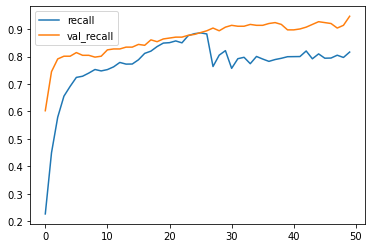

In [87]:
history_func_df_op[['recall', 'val_recall']].plot()

- untuk validation recall mencapai diatas 0.9 
- sedangkan train set recall mencapai diatas 0.85 namun turun lagi dan berakhir di sekitar 0.8

<AxesSubplot:>

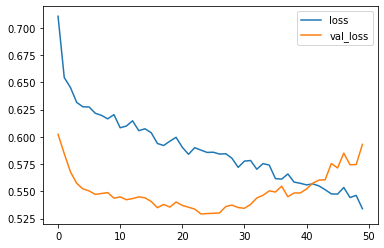

In [88]:
# Plot between loss and val_loss

history_func_df_op[['loss', 'val_loss']].plot()

In [90]:
# Model Evaluation using Classification Report
y_train_pred_func_op = grid_result_seq.predict(X_train_final)
y_train_pred_func_op = np.where(y_train_pred_func_op >= 0.5, 1, 0)
y_test_pred_func_op = grid_result_seq.predict(X_test_final)
y_test_pred_func_op = np.where(y_test_pred_func_op >= 0.5, 1, 0)

print('Train set')
print(classification_report(y_train, y_train_pred_func_op))
print('Test set')
print(classification_report(y_test, y_test_pred_func_op))

44/44 [==============================] - 0s 681us/step
Train set
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      3302
           1       0.52      0.80      0.63      1191

    accuracy                           0.75      4493
   macro avg       0.71      0.77      0.72      4493
weighted avg       0.81      0.75      0.76      4493

Test set
              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1029
           1       0.54      0.78      0.64       374

    accuracy                           0.76      1403
   macro avg       0.72      0.77      0.73      1403
weighted avg       0.81      0.76      0.77      1403



Sama seperti pada sequential API, setelah dicoba untuk melakukan optimasi justru menurunkan nilai recall nya


**`Berdasarkan hasil perbandingan maka diputuskan bahwa model yg terbaik adalah sequential dan functional API sebelum optimasi dengan nilai recall 0.84 pada test set`**

## 8.5 Confusion Matrix

Untuk memahami makna recall 0.84, kita akan melihat confusion matrix nya

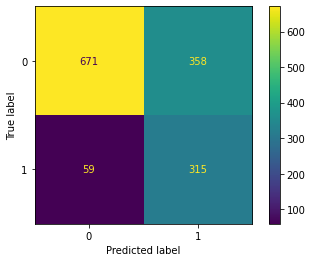

In [97]:
# membuat confusion matrix 
cm = confusion_matrix(y_test, y_test_pred_seq)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

Terlihat bahwa total prediksi yang seharusnya bernilai positif adalah 374, namun model justru menganggap 59 diantaranya sebagai negatif. dengan kata lain: **`Dari seluruh prediksi yang seharusnya menyatakan bahwa 374 pelanggan akan keluar, model justru menganggap 59 diantaranya tidak akan keluar.`**

`Kesimpulan`: Model dapat memprediksi pelanggan yang akan keluar dengan tepat sebesar 84%

# 9. Model Saving

In [55]:
# Freeze model

model_sequential.trainable = False

model_sequential.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                470       
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 567
Trainable params: 0
Non-trainable params: 567
_________________________________________________________________


In [56]:
model_sequential.save("model")

INFO:tensorflow:Assets written to: model\assets


In [57]:
model_sequential.save("model.h5")

In [58]:
with open('scaler.pkl', 'wb') as file_1:
  joblib.dump(scaler, file_1)

with open('encoder.pkl', 'wb') as file_2:
  joblib.dump(encoder, file_2)

with open('list_num_cols.txt', 'w') as file_3:
  json.dump(numeric, file_3)

with open('list_cat_columns.txt', 'w') as file_4:
  json.dump(category, file_4)

# 10. Model Inference

In [59]:
df_inf.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4682-BLBUC,Male,0,Yes,No,44,Yes,No,DSL,No,...,Yes,Yes,Yes,No,One year,Yes,Electronic check,70.95,3250.45,No
1,1131-QQZEB,Male,1,Yes,No,71,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),23.95,1756.20,No
2,0486-LGCCH,Male,0,Yes,Yes,11,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.65,225.75,No
3,0578-SKVMF,Female,0,Yes,Yes,22,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,No,Electronic check,83.30,1845.90,Yes
4,6923-JHPMP,Female,0,No,No,2,Yes,No,Fiber optic,Yes,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,80.45,137.10,No


In [60]:
 # make numerik and categorical data
data_inf_num = df_inf[numeric]
data_inf_cat = df_inf[category]

# Feature Scaling
data_inf_num_scaled = scaler.transform(data_inf_num)

# Feature Encoding
data_inf_cat_scaled =encoder.transform(data_inf_cat).toarray()

# concate numerical and categorical columns
data_inf_final = np.concatenate([data_inf_num_scaled, data_inf_cat_scaled], axis=1)

In [92]:
# Predict df_inf dengan model yang telah dipotimasi
y_pred_inf = model_sequential.predict(data_inf_final)
y_pred_inf = np.where(y_pred_inf >= 0.5, 1, 0)
y_pred_inf

1/1 [==============================] - 0s 19ms/step


array([[0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1]])

In [94]:
# menampilkan nilai Churn dari data inference
df_inf.Churn

0     No
1     No
2     No
3    Yes
4     No
5     No
6     No
7     No
8     No
9    Yes
Name: Churn, dtype: object

# 11. Conclution

**`Berikut merupakan kesimpulan dan saran untuk pengembangan model`**

1. Data set yang memiliki kolom target yang imbalance sehingga perlu dilakukan penanganan dengan oversampling

2. Kolom2 numerikal cenderung terdistribusi normal dan tidak memiliki outlier

3. metrik yang digunakan untuk mengevaluasi model adalah Recall. karena kita ingin membuat model yang sebisa mungkin tidak akan menghasilkan nilai False Negative atau memprediksi kostumer tidak akan keluar(Churn=No) padahal dia akan keluar (Churn= Yes)

4. Model dapat memprediksi pelanggan yang akan keluar dengan tepat sebesar 84%

5. Optimasi model yang dilakukan ternyata belum membuahkan hasil. sehingga masih terdapat ruang untuk melakukan pernaikan terhadapt model

6. optimasi yang mungkin dapat dilakukan adalah mencoba dengan mengubah-ubah activation function yang ada, atau melakukan variasi terhadap metode inisiasi pembobotan.  

